In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.time_series_model_training import *

In [3]:
forecaster = TimeSeriesForecaster("../data/TSLA_historical_data.csv")

In [4]:
TSLA_df = forecaster._load_data()

In [5]:
forecaster.scale_data("../models/TSLA_scaler.pkl")

In [6]:
forecaster.split_data()

In [7]:
xs, ys = forecaster.create_sequences(TSLA_df, 90)

In [8]:
forecaster.train_arima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10955.656, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10963.793, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10963.900, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10955.457, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10961.855, Time=0.96 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10961.919, Time=1.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10960.151, Time=2.75 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-10963.303, Time=0.56 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 6.850 seconds


In [9]:
forecaster.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-9639.148, Time=0.54 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-10260.642, Time=1.31 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=3.82 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-9656.389, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-10491.817, Time=0.99 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=6.02 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=4.57 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-10482.453, Time=0.46 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-10490.555, Time=5.23 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-10490.183, Time=2.58 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-10492.473, Time=0.72 sec
 ARIMA(0,1,1)(1,1,0)[5]             : AIC=-10262.381, Time=1.95 sec
 ARIMA(0,1,1)(2,1,1)[5]             : AIC=inf, Time=3.27 sec
 ARIMA(0,1,1)(1,1,1)[5]             : AIC=inf, Time=7.63 sec
 ARIMA(0,1,2)(2,1,0)[5]             : AIC=

In [10]:
forecaster.train_lstm()

c:\Users\Ashis\Desktop\KAIM Program 2\week_11\week_11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 0.0028 - val_loss: 0.0218
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 3.2920e-04 - val_loss: 0.0330
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.0707e-04 - val_loss: 0.0133
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.0228e-04 - val_loss: 0.0057
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.0652e-04 - val_loss: 0.0038
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.9124e-04 - val_loss: 0.0040
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 1.7160e-04 - val_loss: 0.0066
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 2.4775e-04 - val_loss: 0.0036
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 1.5936e-04 - val_loss: 0.0045
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 1.3295e-04 - val_loss: 0.0030
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 1.4926e-04 - val_loss: 0.0026
Epoch 12/50
44/44 ━━━

In [11]:
forecaster.make_predictions()

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


In [12]:
forecaster.evaluate_models()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


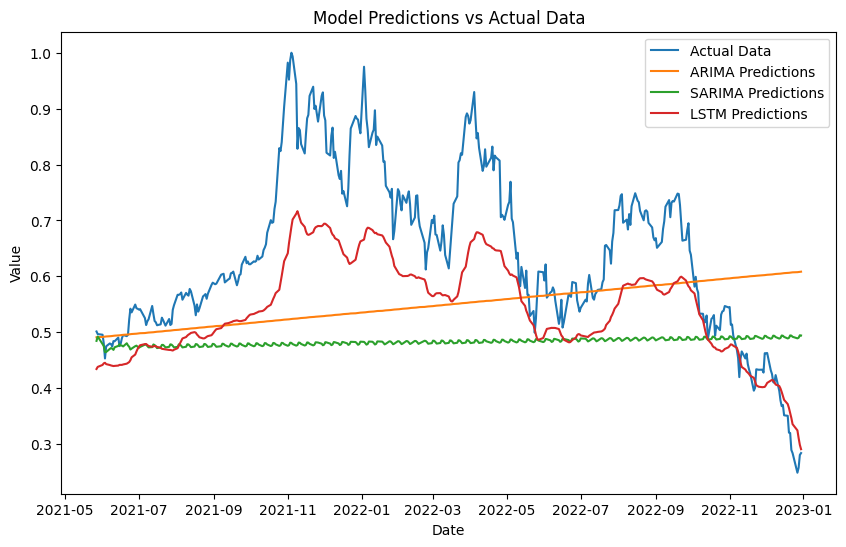

In [13]:
forecaster.plot_results()

In [14]:
forecaster.forecast_future()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step

{'LSTM': [0.28629428,
  0.28441662,
  0.2838217,
  0.28389615,
  0.28430438,
  0.28486514,
  0.2854824,
  0.28610635,
  0.2867124,
  0.28728986,
  0.28783512,
  0.28834814,
  0.28883094,
  0.28928602,
  0.28971612,
  0.29012388,
  0.29051167,
  0.29088163,
  0.29123557,
  0.291575,
  0.29190135,
  0.2922156,
  0.29251868,
  0.29281145,
  0.29309446,
  0.29336822,
  0.29363328,
  0.29389,
  0.2941388,
  0.29437983]}